In [15]:
!pip install opencv-python
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bansa\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Rolling back uninstall of protobuf
  Moving to c:\users\bansa\anaconda3\lib\site-packages\protobuf-3.20.1-py3.8.egg-info
   from C:\Users\bansa\anaconda3\Lib\site-packages\~rotobuf-3.20.1-py3.8.egg-info


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bansa\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [20]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("D:/Machine Learning/forest_fire/Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("D:/Machine Learning/forest_fire/testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')
                                     

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [25]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [26]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
# let's get the model fit. 
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)
# Epochs you can vary! 

Epoch 1/5
58/58 [==============================] - 30s 510ms/step - loss: 0.2784 - accuracy: 0.8821 - val_loss: 0.2735 - val_accuracy: 0.9118
Epoch 2/5
58/58 [==============================] - 33s 565ms/step - loss: 0.1641 - accuracy: 0.9438 - val_loss: 0.8208 - val_accuracy: 0.7206
Epoch 3/5
58/58 [==============================] - 30s 521ms/step - loss: 0.1532 - accuracy: 0.9541 - val_loss: 0.3264 - val_accuracy: 0.8529
Epoch 4/5
58/58 [==============================] - 27s 468ms/step - loss: 0.1090 - accuracy: 0.9634 - val_loss: 0.5716 - val_accuracy: 0.8529
Epoch 5/5
58/58 [==============================] - 30s 516ms/step - loss: 0.1445 - accuracy: 0.9547 - val_loss: 0.2151 - val_accuracy: 0.8824


In [29]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 50ms/step


In [30]:
print(len(predictions))

68


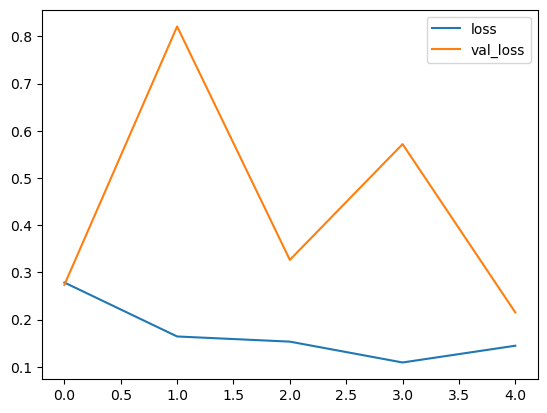

In [31]:
# it's time to plot it! Lets plot loss. 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

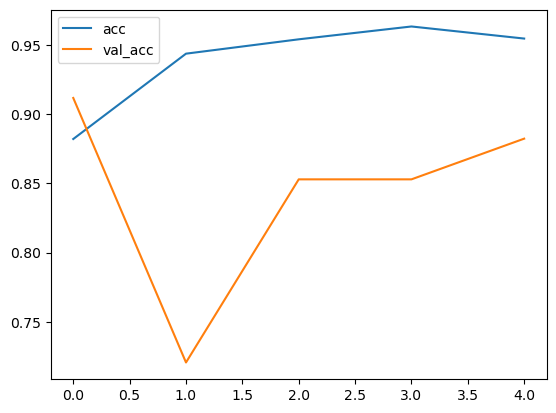

In [32]:
# How much accurate it is? 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=25)
    elif val == 0:
        plt.xlabel("Fire",fontsize=25)

1/1 [==============================] - 0s 28ms/step
[[0.]]


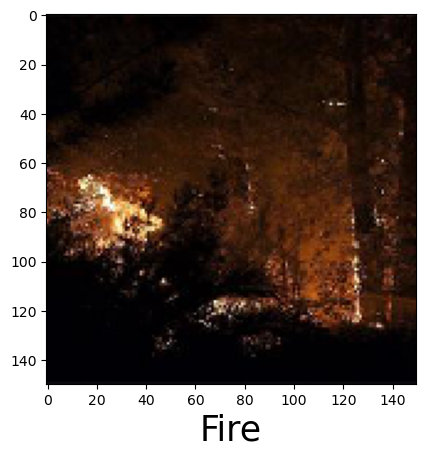

In [37]:
predictImage("D:/Machine Learning/forest_fire/Training and Validation/fire/abc001.jpg")

1/1 [==============================] - 0s 25ms/step
[[1.]]


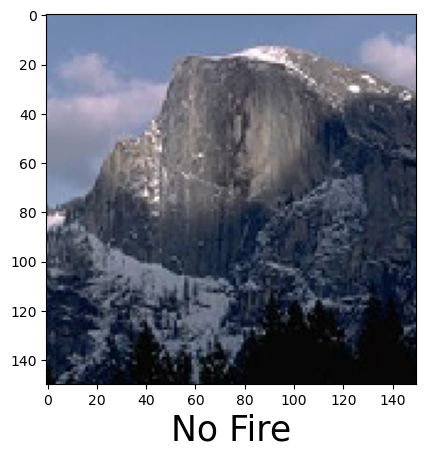

In [40]:
predictImage("D:/Machine Learning/forest_fire/Testing/nofire/abc335.jpg")